# Section 1: Markdown Syntax

## Subsection 1.1

The **quick** brown fox *jumps* over the `lazy` dog.

> That was a really cool sentence!

## Subsection 1.2: Itemized and Enumerated Lists

- It is very important to check the Binomial Conditions before using the Binomial Distribution!
    - Failure to check the necessary conditions can lead to incorrect results.
    - Incorrect results are not good!

## Subsection 1.3: Typesetting Equations

The Pythagorean Theorem states that $a^2 + b^2 = c^2$

$$ f_X(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2} $$

- **Pythagorean Theorem:** $a^2 + b^2 = c^2$
- **Euler's Identity:** $e^{i \pi} + 1 = 0$

$$ 
f_X(x) = \begin{cases} 
    \frac{1}{b - a} & \text{if } a \leq x \leq b\\
    0 & \text{otherwise}
    \end{cases} 
$$

\begin{align*}
    \overline{x} & = \frac{1}{n} \sum_{i=1}^{n} x_i \\
    n \overline{x} & = \sum_{i=1}^{n} x_i 
\end{align*}

## Section 1.4: Hyperlinks

[PSTAT Department Website](htpps://pstat5a.github.io)

# Section 2: Importing and Manipulating Data

In [1]:
from datascience import *

In [2]:
air = Table.read_table("https://pstat5a.github.io/Files/Datasets/air22.csv")

To find the number of observational units, we simply count the rows in the table using the `.num_rows` method:

In [3]:
air.num_rows

20345

To find the number of variables (i.e. the number of columns in the data matrix), we use the `.num_columns` method:

In [4]:
air.num_columns

21

Following the hint, we can use the `.labels` method to list the column *labels* (i.e. variable names) of the data matrix:

In [5]:
air.labels

('year',
 'month',
 'carrier',
 'carrier_name',
 'airport',
 'airport_name',
 'arr_flights',
 'arr_del15',
 'carrier_ct',
 'weather_ct',
 'nas_ct',
 'security_ct',
 'late_aircraft_ct',
 'arr_cancelled',
 'arr_diverted',
 'arr_delay',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay')

To display only the `arr_del15` column we can use the command:

In [6]:
air.column("arr_del15")

array([  7.,   3.,  14., ...,   3.,   1.,  17.])

To find which years were included in the dataset, we display the `year` column of the data matrix:

In [7]:
air.column("year") # seems like only 2022 is included in the dataset

array([2022, 2022, 2022, ..., 2022, 2022, 2022])

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

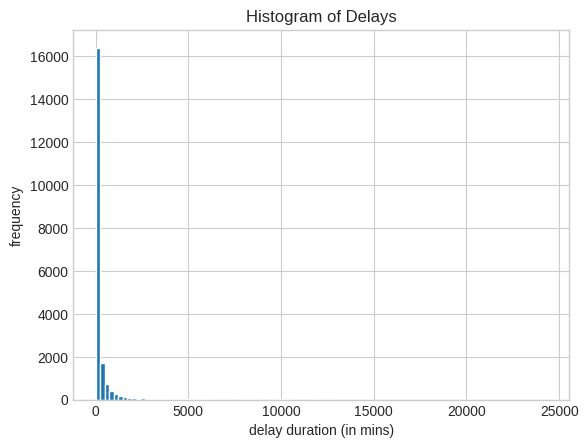

In [9]:
plt.hist(air.column("weather_delay"),
         bins = 100,
         edgecolor = "white");
plt.xlabel("delay duration (in mins)");
plt.ylabel("frequency");
plt.title("Histogram of Delays");

Here's how we can easily find the answer to the question "how many observational units were recorded from Alaska Airlines?" 

As mentioned in the lab handout, `air.column("carrier") == "AS"` returns a boolean vector with `True` elements corresponding to values in `carrier` that have values `AS`. Since `True` is encoded as `1` and `False` is encoded as `0` (as was discussed in a previous lab), summing up the elements in the array `air.column("carrier") == "AS"` will result in the total *number* of `True` elements; i.e. the number of flights that were maintained by Alaska Airlines.

In [10]:
sum(air.column("carrier") == "AS")

975

The code `air.row(air.column(1) == 1)` is selecting the rows of the `air` data matrix whose second column entry (i.e. month) entry is equal to 1; i.e. it returns the portion of the data matrix corresponding to flights taking place in January.

The code `air.row(air.column(1) == 2)[6]` returns the durations of flgihts that took place in February (i.e. the *second* month).

Thus, putting these two facts together, we can create a `for`-loop to give us the average duration of flights per month:

In [11]:
import numpy as np

means = []
for k in np.arange(1, 13):
  means.append(np.nanmean(air.row(air.column(1) == k)[6]))


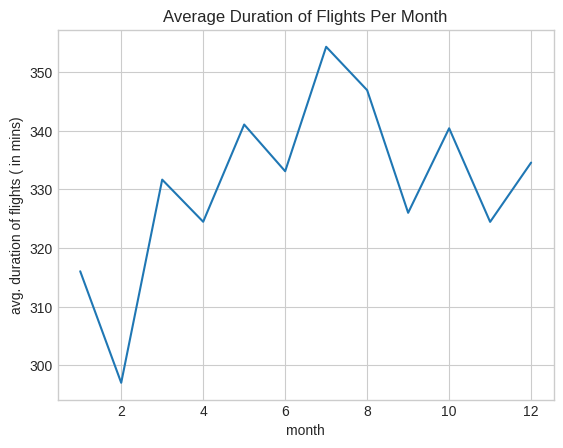

In [12]:
plt.plot(np.arange(1, 13),
         means);
plt.xlabel("month");
plt.ylabel("avg. duration of flights ( in mins)");
plt.title("Average Duration of Flights Per Month");